In [1]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import time
import sys
import torch
import pandas as pd 

import pickle
sys.path.insert(0, './../../modules')

from Utils import running_mean as rm
from Utils import one_hot_state, onehot_state_collection, twoD_states

# import representation type
from Agents.RepresentationLearning import PlaceCells
# import actor critic network
from Agents.Networks import ActorCritic as Network
# import agent class wrapper to handle behaviour
from Agents import Agent
# import experiment class to handle run and logging
from Experiments import expt


# get environment
import gym
sys.path.append('../../../basic/')
sys.path.append('../../../')

from Agents.EpisodicMemory import EpisodicMemory as Memory


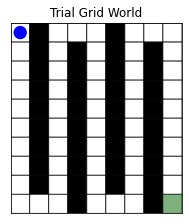

In [2]:
# make env
env_name = 'gym_grid:gridworld-v6'
env = gym.make(env_name)
plt.show()

In [3]:
oh_state_reps = {}
    
place_cells = PlaceCells(env.shape, env.nstates, field_size=0.1)
pc_state_reps = {}

for state in env.useable:
    oh_state_reps[env.twoD2oneD(state)] = one_hot_state(env,env.twoD2oneD(state))
    pc_state_reps[env.twoD2oneD(state)] = place_cells.get_activities([state])[0]

input_dims = len(oh_state_reps[list(oh_state_reps.keys())[0]])

In [4]:
print(oh_state_reps[0])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [5]:
## onehot state representations
for _ in range(1):
    env.random_start=True
    oh_network = Network(input_dims=[input_dims],fc1_dims=200,fc2_dims=200,output_dims=env.action_space.n, lr=0.0005)
    oh_agent = Agent(oh_network, state_representations=oh_state_reps)

    ex = expt(oh_agent,env)

    num_trials = 5000
    num_events = 250
    ex.run(num_trials, num_events)

    expt_type = 'onehot_train'
    directory = '../../Data/'
    filename  = 'mf_training.csv'

    ex.record_log(expt_type, env_name, num_trials, num_events, dir=directory, file=filename)

/home/annik/.local/lib/python3.8/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


Episode: 0, Score: -2.4999999999999907 (Running Avg:-2.4999999999999907) [0.26836609840393066s]
Episode: 100, Score: 9.91 (Running Avg:1.0710000000000064) [16.03350830078125s]
Episode: 200, Score: -2.4999999999999907 (Running Avg:1.1740000000000061) [14.655055284500122s]
Episode: 300, Score: 9.82 (Running Avg:-0.028999999999992455) [14.93550729751587s]
Episode: 400, Score: -2.4999999999999907 (Running Avg:2.3880000000000057) [13.82157301902771s]
Episode: 500, Score: -2.4999999999999907 (Running Avg:-1.2619999999999916) [14.303799152374268s]
Episode: 600, Score: -2.4999999999999907 (Running Avg:-1.2509999999999917) [14.60131287574768s]
Episode: 700, Score: 9.91 (Running Avg:2.4650000000000056) [13.51096796989441s]
Episode: 800, Score: 10.0 (Running Avg:-0.0029999999999924753) [14.010683298110962s]
Episode: 900, Score: -2.4999999999999907 (Running Avg:-0.0179999999999926) [15.882170677185059s]
Episode: 1000, Score: 9.91 (Running Avg:3.7090000000000045) [13.813767671585083s]
Episode: 1100

In [ ]:
## place cell representations
for _ in range(5):
    pc_network = Network(input_dims=[input_dims],fc1_dims=200,fc2_dims=200,output_dims=env.action_space.n, lr=0.0005)
    pc_agent = Agent(pc_network, state_representations=pc_state_reps)

    ex = expt(pc_agent,env)

    num_trials = 5000
    num_events = 250
    ex.run(num_trials, num_events)

    expt_type = 'place_cell_train'
    directory = '../../Data/'
    filename  = 'mf_training.csv'
    
    ex.data['place_cells'] = place_cells
    
    extras = [place_cells.field_size]

    ex.record_log(expt_type, env_name, num_trials, num_events, dir=directory, file=filename, extra=extras)

In [ ]:
## place cell representations
for f in [0.1]:
    for e in range(5):
        env_name = f'gym_grid:gridworld-v{e+1}'
        env = gym.make(env_name)
        place_cells = PlaceCells(env.shape, 200, field_size=f)
        pc_state_reps = {}

        for state in env.useable:
            pc_state_reps[env.twoD2oneD(state)] = place_cells.get_activities([state])[0]
            
        input_dims = len(pc_state_reps[list(pc_state_reps.keys())[0]])

        for _ in range(5):
            pc_network = Network(input_dims=[input_dims],fc1_dims=200,fc2_dims=200,output_dims=env.action_space.n, lr=0.0005)
            pc_agent = Agent(pc_network, state_representations=pc_state_reps)

            ex = expt(pc_agent,env)

            num_trials = 5000
            num_events = 250
            ex.run(num_trials, num_events)

            expt_type = 'place_cell_train'
            directory = '../../Data/'
            filename  = 'mf_training.csv'

            ex.data['place_cells'] = place_cells.cell_centres

            extras = [input_dims, place_cells.field_size]

            ex.record_log(expt_type, env_name, num_trials, num_events, dir=directory, file=filename, extra=extras)

In [ ]:
# successor representations
with open(f'../../modules/Agents/RepresentationLearning/SR_{env_name}.p', 'rb') as f:
    sr_ = pickle.load(f)

In [ ]:
sr_reps = {}
SR = np.sum(sr_, axis = 0)
for index in range(SR.shape[0]):
    sr_reps[index] = SR[index]

In [ ]:
index = 250
plt.figure()
plt.imshow(sr_reps[index].reshape(*env.shape))
plt.show()

In [ ]:
## successor representations
sr_reps = {}
SR = np.sum(sr_, axis = 0)
for index in range(SR.shape[0]):
    sr_reps[index] = SR[index]
    
for _ in range(1):
    input_dims = len(sr_reps[list(sr_reps.keys())[0]])
    
    sr_network = Network(input_dims=[input_dims],fc1_dims=200,fc2_dims=200,output_dims=env.action_space.n, lr=0.0005)
    sr_agent = Agent(sr_network, state_representations=sr_reps)

    ex = expt(sr_agent,env)

    num_trials = 5000
    num_events = 250
    ex.run(num_trials, num_events)

    expt_type = 'sr_train_with_rec'
    directory = '../../Data/'
    filename  = 'mf_training.csv'

    ex.record_log(expt_type, env_name, num_trials, num_events, dir=directory, file=filename)

In [ ]:
print(ex.data['P_snap'][-1])

In [ ]:
from Utils.gridworld_plotting import *

In [ ]:
index = 5000-1
plot_pref_pol(env, ex.data['P_snap'][index])

In [ ]:
### testing 
df = pd.read_csv('../../Data/mf_training.csv')

for j in range(len(df)):
    print(i)
    i = int(j+130)
    line = df.iloc[i]
    if line['pass']=='pass':
        pass
    else:
        run_id    = line['run_id']
        env_type  = line['env_type']
        expt_type = line['expt_type']
        num_cells = line['Num_inputs']

        # make environment
        env = gym.make(env_type)
        # remap reward 
        env.set_reward({(15,15):10})

        # make network
        network = torch.load(f'../../Data/agents/{run_id}.pt')

        # get state representations
        if expt_type == 'onehot_train':
            print("Using Onehot Representation")
            state_reps = {}
            for state in env.useable:
                state_reps[env.twoD2oneD(state)] = one_hot_state(env,env.twoD2oneD(state))

        elif expt_type == 'place_cell_train':
            print("Using Place Cell Representation")
            fs = line['PlaceCell_fieldsize']
            with open(f'../../Data/results/{run_id}_data.p', 'rb') as f:
                cell_centres = pickle.load(f)['place_cells']
            state_reps = {}
            pcs = PlaceCells(env.shape,num_cells=int(num_cells), field_size=fs, cell_centres=cell_centres)
            for state in env.useable:
                state_reps[env.twoD2oneD(state)] = pcs.get_activities([state])[0]

        if expt_type[0:8] == 'sr_train':
            print("Using Successor Representation")
            with open(f'../../modules/Agents/RepresentationLearning/SR_{env_type}.p', 'rb') as f:
                sr_ = pickle.load(f)

            state_reps = {}
            SR = np.sum(sr_, axis = 0)
            for index in range(SR.shape[0]):
                state_reps[index] = SR[index]

        # make agent
        agent = Agent(network, state_representations=state_reps)

        # make experiment
        ex = expt(agent,env)

        num_trials = 5000
        num_events = 250
        # run experiment
        ex.run(num_trials, num_events)

        # log results 
        expt_type = f'{expt_type[:-6]}_testing'
        directory = '../../Data/'
        filename  = 'mf_testing.csv'

        if expt_type == 'place_cell_train':
            ex.data['place_cells'] = place_cells.cell_centres

        extras = [run_id]

        ex.record_log(expt_type, env_type, num_trials, num_events, dir=directory, file=filename, extra=extras,
                     mock_log=False)


In [ ]:
print(expt_type[:-6])

In [ ]:
print(state_reps.keys())

In [ ]:
print(expt_type[0:8])

In [ ]:
## with EC
### testing 
df = pd.read_csv('../../Data/mf_training.csv')

for j in range(len(df)):    
    i = int(j)
    if i ==0:
        pass
    line = df.iloc[i]
    if line['pass']=='pass':
        pass
    else:
        run_id    = line['run_id']
        env_type  = line['env_type']
        expt_type = line['expt_type']
        num_cells = line['Num_inputs']

        # make environment
        env = gym.make(env_type)
        # remap reward 
        env.set_reward({(15,15):10})

        # make network
        network = torch.load(f'../../Data/agents/{run_id}.pt')

        # get state representations
        if expt_type == 'onehot_train':
            print("Using Onehot Representation")
            state_reps = {}
            for state in env.useable:
                state_reps[env.twoD2oneD(state)] = one_hot_state(env,env.twoD2oneD(state))

        elif expt_type == 'place_cell_train':
            print("Using Place Cell Representation")
            fs = line['PlaceCell_fieldsize']
            with open(f'../../Data/results/{run_id}_data.p', 'rb') as f:
                cell_centres = pickle.load(f)['place_cells']
            state_reps = {}
            pcs = PlaceCells(env.shape,num_cells=int(num_cells), field_size=fs, cell_centres=cell_centres)
            for state in env.useable:
                state_reps[env.twoD2oneD(state)] = pcs.get_activities([state])[0]

        if expt_type[0:8] == 'sr_train':
            print("Using Successor Representation")
            with open(f'../../modules/Agents/RepresentationLearning/SR_{env_type}.p', 'rb') as f:
                sr_ = pickle.load(f)

            state_reps = {}
            SR = np.sum(sr_, axis = 0)
            for index in range(SR.shape[0]):
                state_reps[index] = SR[index]
        
        # make memory
        memory = Memory(cache_limit=400, entry_size=env.action_space.n)
        # make agent
        agent = Agent(network, state_representations=state_reps, memory=memory)
        agent.get_action = agent.EC_action
        # make experiment
        ex = expt(agent,env)

        num_trials = 1000
        num_events = 250
        # run experiment
        ex.run(num_trials, num_events)

        # log results 
        expt_type = f'{expt_type[:-6]}_testing'
        directory = '../../Data/'
        filename  = 'ec_testing.csv'

        if expt_type == 'place_cell_train':
            ex.data['place_cells'] = place_cells.cell_centres

        extras = [run_id]

        ex.record_log(expt_type, env_type, num_trials, num_events, dir=directory, file=filename, extra=extras,
                     mock_log=False)